In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# EDA

In [98]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [99]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [100]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [101]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [102]:
zero_features = ['Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
mean = df[zero_features].mean()
df[zero_features]=df[zero_features].replace(0, mean)
df['Glucose_Insulin_Ratio'] = df['Glucose'] / df['Insulin']
df['BMI_Age_Interaction'] = df['BMI'] * df['Age']

<Axes: >

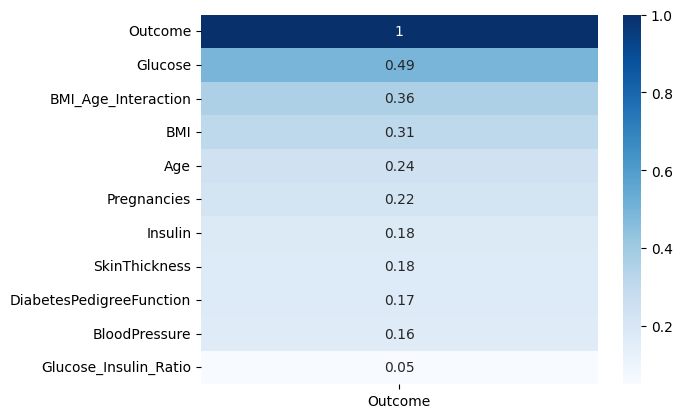

In [103]:
sns.heatmap(df.corr()[['Outcome']].sort_values(by = 'Outcome', ascending = False), annot = True, cmap = 'Blues')

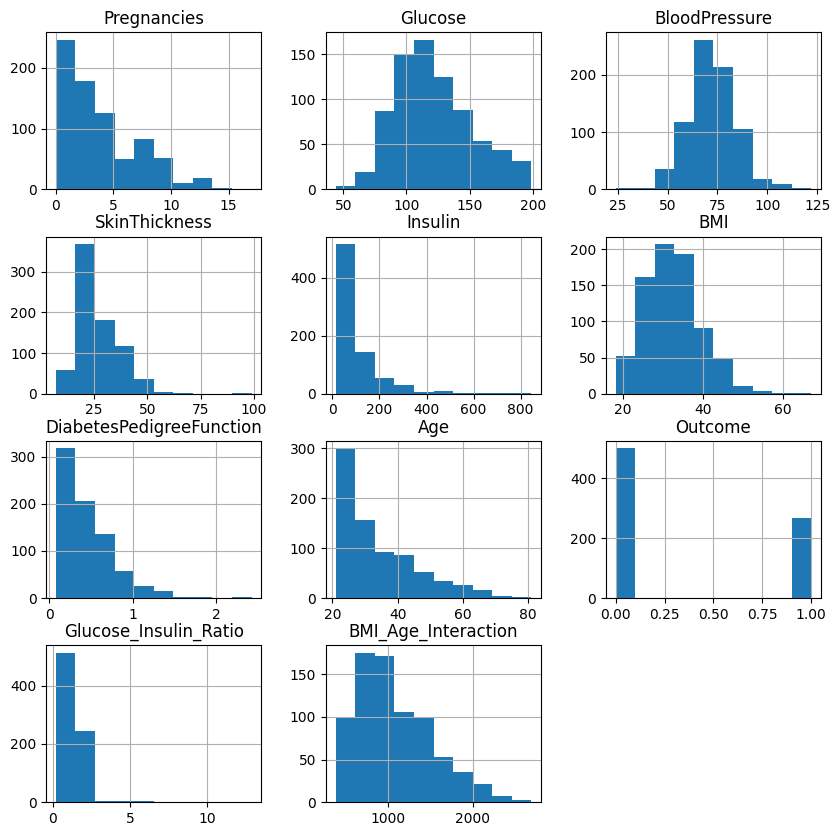

In [104]:
df.hist(figsize=(10,10))
plt.show()

In [105]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Insulin_Ratio,BMI_Age_Interaction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958,1.334941,1080.772674
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951,0.763379,437.770385
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.206667,382.200000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000,0.934881,744.800000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000,1.278204,987.250000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.616552,1357.200000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,12.857143,2697.000000


In [106]:
import plotly.express as px
color_discrete_map = {0: 'dodgerblue', 1: 'crimson'}

In [107]:
fig = px.histogram(df, x="Pregnancies", color="Outcome", marginal="box",hover_data=df.columns,color_discrete_map=color_discrete_map)
fig.update_layout(
    title="Distribution of Pregnancies by Outcome",
    xaxis_title="Number of Pregnancies",
    yaxis_title="Count",
    legend_title="Diagnosis",
)

fig.for_each_trace(lambda t: t.update(name='Healthy' if t.name == '0' else 'Diabetes'))

fig.show()

In [108]:
fig = px.histogram(df, x="Glucose", color="Outcome", marginal="box",hover_data=df.columns,color_discrete_map=color_discrete_map)
fig.update_layout(
    title="Distribution of Glucose Levels by Outcome",
    xaxis_title="Plasma Glucose Concentration",
    yaxis_title="Count",
    legend_title="Diagnosis",
)

fig.for_each_trace(lambda t: t.update(name='Healthy' if t.name == '0' else 'Diabetes'))

fig.show()

In [109]:
fig = px.histogram(df, x="BloodPressure", color="Outcome", marginal="box",hover_data=df.columns,color_discrete_map=color_discrete_map)
fig.update_layout(
    title="Distribution of Blood Pressure by Outcome",
    xaxis_title="Diastolic blood pressure (mm Hg)",
    yaxis_title="Count",
    legend_title="Diagnosis",
)

fig.for_each_trace(lambda t: t.update(name='Healthy' if t.name == '0' else 'Diabetes'))

fig.show()

In [110]:
fig = px.histogram(df, x="SkinThickness", color="Outcome", marginal="box",hover_data=df.columns,color_discrete_map=color_discrete_map)
fig.update_layout(
    title="Distribution of Skin Thickness by Outcome",
    xaxis_title="Triceps skin fold thickness (mm)",
    yaxis_title="Count",
    legend_title="Diagnosis",
)

fig.for_each_trace(lambda t: t.update(name='Healthy' if t.name == '0' else 'Diabetes'))

fig.show()

In [111]:
fig = px.histogram(df, x="Insulin", color="Outcome", marginal="box",hover_data=df.columns,color_discrete_map=color_discrete_map)
fig.update_layout(
    title="Distribution of Insulin Levels by Outcome",
    xaxis_title="2-Hour serum insulin (mu U/ml)",
    yaxis_title="Count",
    legend_title="Diagnosis",
)

fig.for_each_trace(lambda t: t.update(name='Healthy' if t.name == '0' else 'Diabetes'))

fig.show()

In [112]:
fig = px.histogram(df, x="BMI", color="Outcome", marginal="box",hover_data=df.columns,color_discrete_map=color_discrete_map)
fig.update_layout(
    title="Distribution of BMI by Outcome",
    xaxis_title="Body Mass Index",
    yaxis_title="Count",
    legend_title="Diagnosis",
)

fig.for_each_trace(lambda t: t.update(name='Healthy' if t.name == '0' else 'Diabetes'))

fig.show()

In [113]:
fig = px.histogram(df, x="DiabetesPedigreeFunction", color="Outcome", marginal="box",hover_data=df.columns,color_discrete_map=color_discrete_map)
fig.update_layout(
    title="Distribution of DPF by Outcome",
    xaxis_title="2-Hour serum insulin (mu U/ml)",
    yaxis_title="Count",
    legend_title="Diagnosis",
)

fig.for_each_trace(lambda t: t.update(name='Healthy' if t.name == '0' else 'Diabetes'))

fig.show()

In [114]:
fig = px.histogram(df, x="Age", color="Outcome", marginal="box",hover_data=df.columns,color_discrete_map=color_discrete_map)
fig.update_layout(
    title="Distribution of Age by Outcome",
    xaxis_title="Age",
    yaxis_title="Count",
    legend_title="Diagnosis",
)

fig.for_each_trace(lambda t: t.update(name='Healthy' if t.name == '0' else 'Diabetes'))

fig.show()

In [115]:
fig = px.histogram(df, x="Glucose_Insulin_Ratio", color="Outcome", marginal="box",hover_data=df.columns,color_discrete_map=color_discrete_map)
fig.update_layout(
    title="Distribution of Glucose Insulin Ratio by Outcome",
    xaxis_title="Glucose / Insulin",
    yaxis_title="Count",
    legend_title="Diagnosis",
)

fig.for_each_trace(lambda t: t.update(name='Healthy' if t.name == '0' else 'Diabetes'))

fig.show()

In [116]:
fig = px.histogram(df, x="BMI_Age_Interaction", color="Outcome", marginal="box",hover_data=df.columns,color_discrete_map=color_discrete_map)
fig.update_layout(
    title="Distribution of BMI * Age by Outcome",
    xaxis_title="BMI * Age",
    yaxis_title="Count",
    legend_title="Diagnosis",
)

fig.for_each_trace(lambda t: t.update(name='Healthy' if t.name == '0' else 'Diabetes'))

fig.show()

# Modeling

## Logistic Regression

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score

In [118]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis = 1), df['Outcome'], test_size = 0.2, random_state = 427)

In [119]:
scaler = StandardScaler()
lr = LogisticRegression()

In [120]:
pipe = Pipeline([('scaler', scaler), ('lr', lr)])

In [121]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [122]:
print(f'Train Accuracy: {pipe.score(X_train, y_train)}')
print(f'Test Accuracy: {pipe.score(X_test, y_test)}')

Train Accuracy: 0.7752442996742671
Test Accuracy: 0.7337662337662337


In [123]:
pipe.named_steps['lr'].coef_

array([[ 0.45657851,  1.23264376, -0.16814007, -0.01834054, -0.23540968,
         0.5102607 ,  0.28328797,  0.00517632, -0.23898365,  0.32245972]])

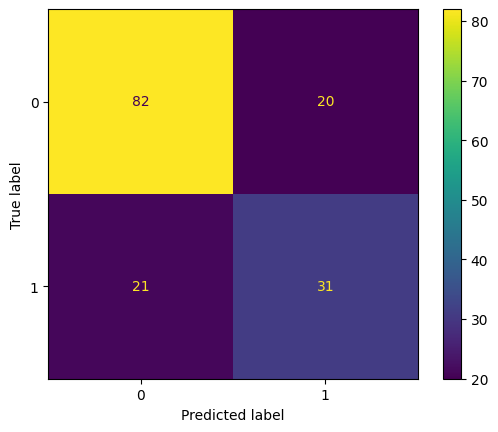

In [124]:
confusion = ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

In [125]:
print(f"Recall: {recall_score(y_test, pipe.predict(X_test))}")

Recall: 0.5961538461538461


## Logistic Regression with Polynomial Features

In [126]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
lr = LogisticRegression(max_iter = 1000, solver = 'liblinear')

In [127]:
polypipe = Pipeline([('scaler', scaler), ('polynomial_features',poly), ('logistic_regression',lr)])

In [128]:
polypipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial_features', PolynomialFeatures()),
                ('logistic_regression',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [129]:
print(f'Train Accuracy: {polypipe.score(X_train, y_train)}')
print(f'Test Accuracy: {polypipe.score(X_test, y_test)}')

Train Accuracy: 0.8192182410423453
Test Accuracy: 0.7337662337662337


In [130]:
print(f"Recall: {recall_score(y_test, polypipe.predict(X_test))}")

Recall: 0.5961538461538461


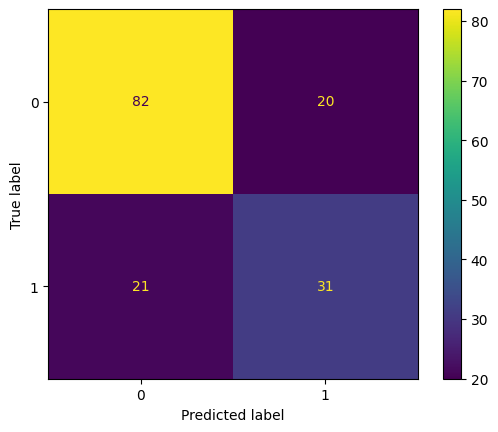

In [131]:
ConfusionMatrixDisplay.from_estimator(polypipe, X_test, y_test)

## K-Nearest Neighbors

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [133]:
params = {'n_neighbors': range(1, 15)}
knn = KNeighborsClassifier()
grid1 = GridSearchCV(knn, param_grid=params)

In [134]:
grid1.fit(scaler.fit_transform(X_train), y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)})

In [135]:
grid1.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [136]:
print(f'Train Accuracy: {grid1.score(scaler.transform(X_train), y_train)}')
print(f'Test Accuracy: {grid1.score(scaler.transform(X_test), y_test)}')

Train Accuracy: 0.8045602605863192
Test Accuracy: 0.7207792207792207


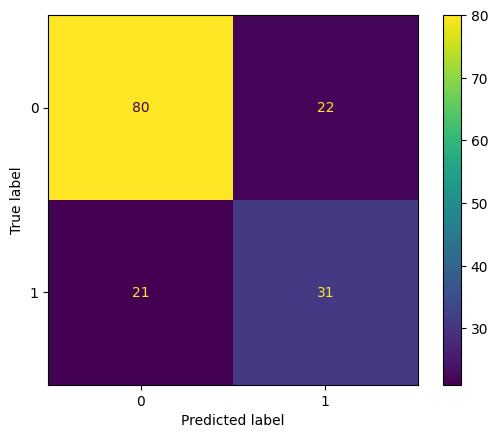

In [137]:
ConfusionMatrixDisplay.from_estimator(grid1, scaler.transform(X_test), y_test)

In [138]:
recall_score(y_test, grid1.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



1.0

## Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
forest = RandomForestClassifier()
params = {
    'max_depth': [2,4,6,8],
    'n_estimators': [50, 100, 150, 200],
}
grid2 = GridSearchCV(forest, param_grid=params)

In [141]:
grid2.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 150, 200]})

In [142]:
grid2.best_estimator_

RandomForestClassifier(max_depth=6)

In [143]:
print(f'Train Accuracy: {grid2.score(X_train, y_train)}')
print(f'Test Accuracy: {grid2.score(X_test, y_test)}')

Train Accuracy: 0.8973941368078175
Test Accuracy: 0.7662337662337663


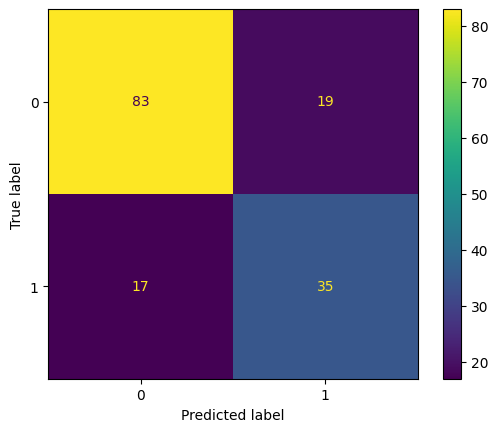

In [144]:
ConfusionMatrixDisplay.from_estimator(grid2, X_test, y_test)

In [145]:
recall_score(y_test, grid2.predict(X_test))

0.6730769230769231

In [146]:
grid2.best_estimator_.feature_importances_

array([0.05553504, 0.27747359, 0.04143512, 0.03552253, 0.06538375,
       0.11255054, 0.07439096, 0.09692425, 0.06318871, 0.17759552])

## Gradient Boosting

In [147]:
!pip install xgboost

In [148]:
import xgboost as xgb

In [149]:
model = xgb.XGBClassifier(objective='binary:logistic')
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
}
grid3 = GridSearchCV(model, param_grid=param_grid)

In [150]:
grid3.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [151]:
grid3.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [152]:
print(f'Train Accuracy: {grid3.score(X_train, y_train)}')
print(f'Test Accuracy: {grid3.score(X_test, y_test)}')

Train Accuracy: 0.8762214983713354
Test Accuracy: 0.7792207792207793


In [153]:
recall_score(y_test, grid3.predict(X_test))

0.6923076923076923

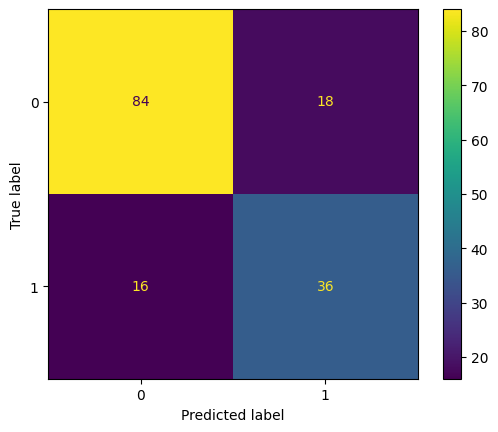

In [154]:
ConfusionMatrixDisplay.from_estimator(grid3, X_test, y_test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

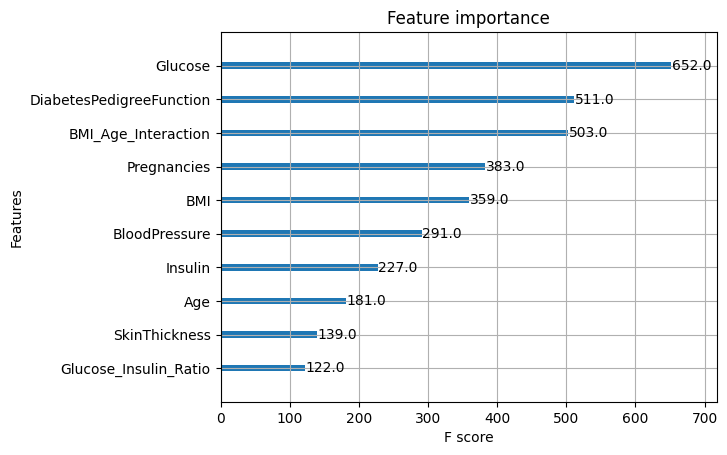

In [155]:
xgb.plot_importance(grid3.best_estimator_)

In [156]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay


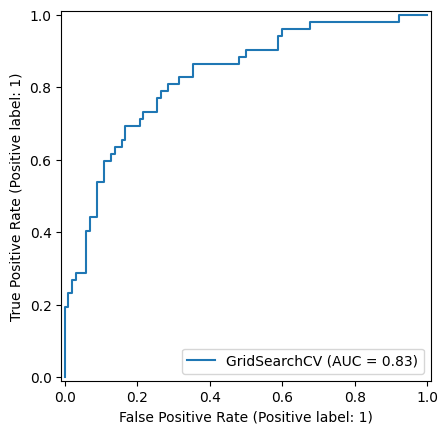

In [157]:
RocCurveDisplay.from_estimator(grid3, X_test, y_test)

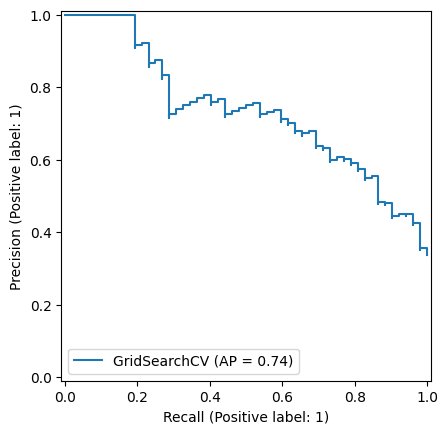

In [158]:
PrecisionRecallDisplay.from_estimator(grid3, X_test, y_test)